In [1]:
import torch
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
t_stats = joblib.load('torch.stats')
tf_stats = joblib.load('tf.stats')

In [3]:
np.array(t_stats[0]).shape

(19500, 4)

In [4]:
df = pd.DataFrame(np.concatenate([t_stats[0], tf_stats[0]], axis=1), 
                  columns=['torch_d_loss', 'torch_gp', 'torch_g_loss', 'torch_ce', 
                           'tf_d_loss', 'tf_gp', 'tf_g_loss', 'tf_ce'])

In [5]:
df.head(10)

,torch_d_loss,torch_gp,torch_g_loss,torch_ce,tf_d_loss,tf_gp,tf_g_loss,tf_ce
0,0.008802,6.632891,2.166572,2.086988,0.000264,6.349609,2.120787,2.064657
1,-0.016830,6.432682,2.172596,2.085386,-0.029915,6.246073,2.084027,2.028284
2,-0.027091,6.131971,2.262881,2.171349,-0.046850,6.131103,2.188017,2.125898
3,-0.054239,5.969512,2.299412,2.207715,-0.069085,5.986959,2.271365,2.196426
4,-0.088962,5.747546,2.114792,2.017910,-0.093928,5.808120,2.104891,2.027406
5,-0.105669,5.376120,2.203838,2.094899,-0.155312,5.425951,2.176850,2.081819
6,-0.178866,5.113042,2.236666,2.130055,-0.181970,5.074129,2.232122,2.108676
7,-0.221432,4.649636,2.128912,1.996476,-0.232364,4.689621,2.150601,2.014454
8,-0.228871,4.295739,2.211735,2.100375,-0.276947,4.157255,2.216523,2.079604
9,-0.317561,3.698330,2.152493,2.011880,-0.313374,3.625019,2.154010,2.011066


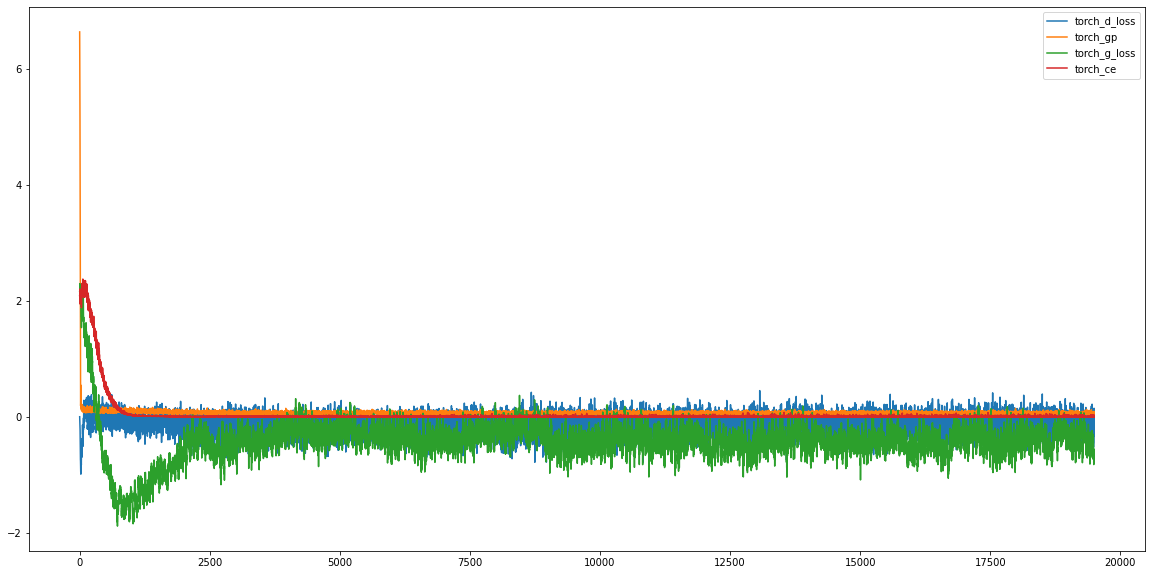

In [6]:
df.iloc[:,:4].plot(figsize=(20,10))

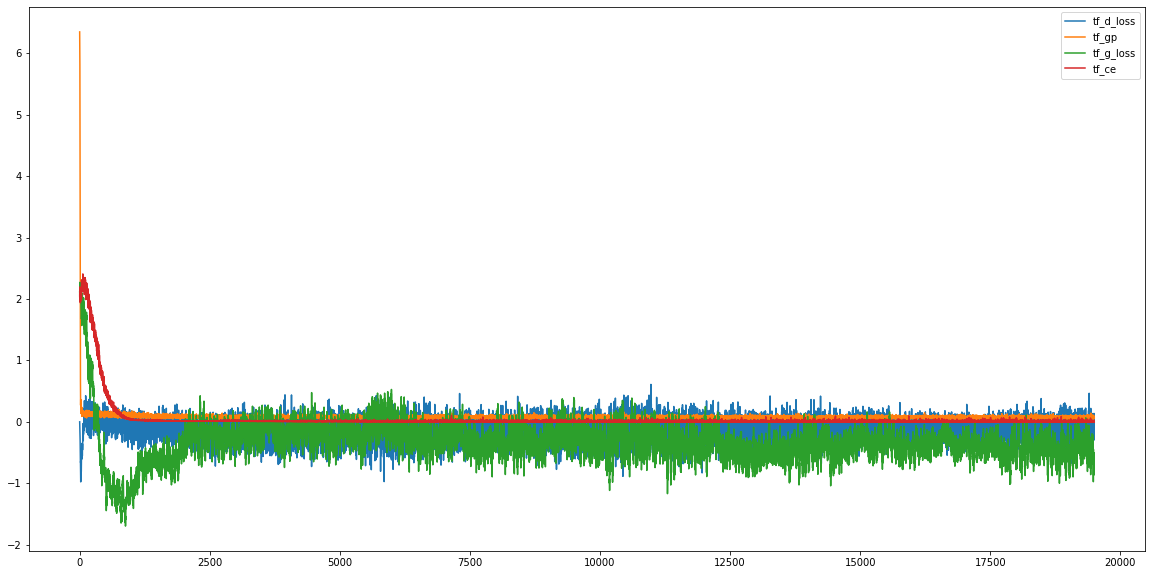

In [7]:
df.iloc[:,4:].plot(figsize=(20,10))

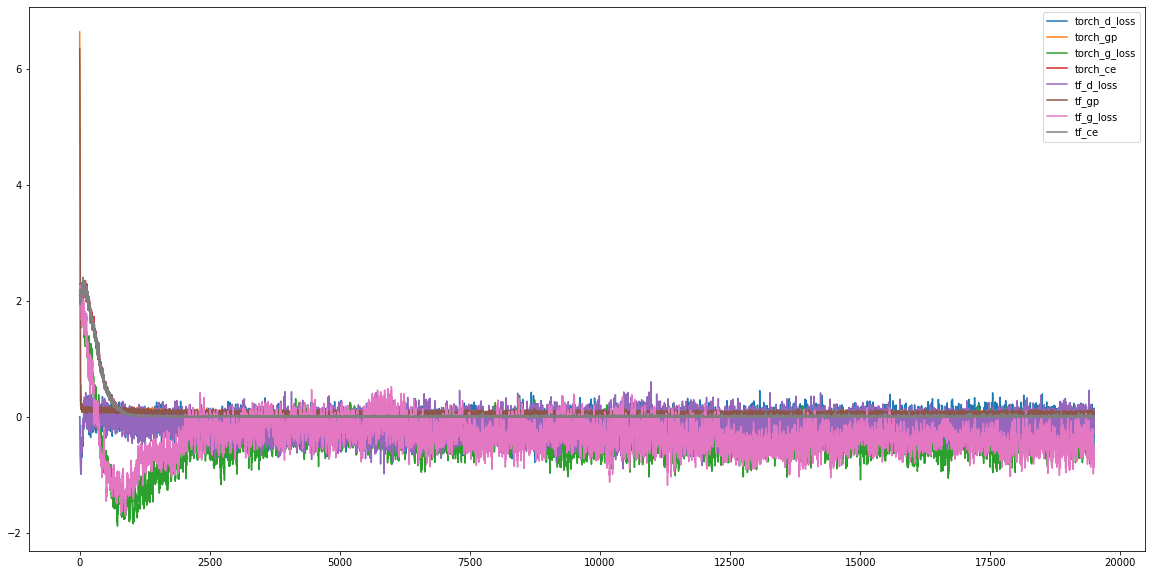

In [8]:
df.plot(figsize=(20,10))

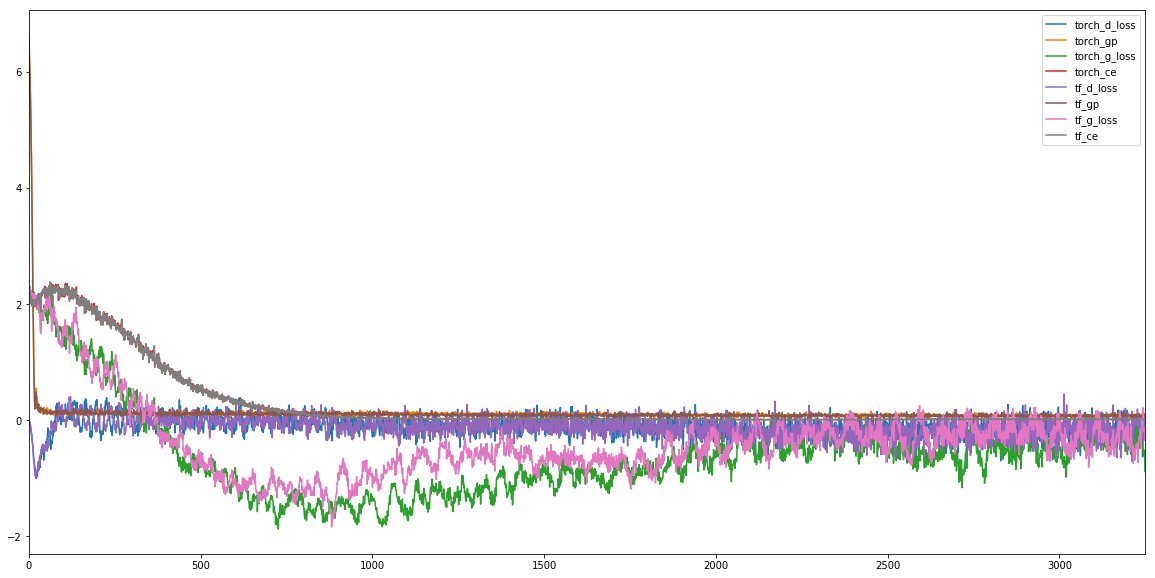

In [195]:
df.plot(figsize=(20,10))

In [98]:
t_cols = list()
f = 't_'
models = ['d_', 'g_']
for i in range(len(models)):
    m = models[i]
    for l in range(len(t_stats[i+1][0])//2):
        t_cols.append(f + m + str(l) + '_w')
        t_cols.append(f + m + str(l) + '_b')
t_cols

['t_d_0_w',
 't_d_0_b',
 't_d_1_w',
 't_d_1_b',
 't_d_2_w',
 't_d_2_b',
 't_g_0_w',
 't_g_0_b',
 't_g_1_w',
 't_g_1_b',
 't_g_2_w',
 't_g_2_b',
 't_g_3_w',
 't_g_3_b',
 't_g_4_w',
 't_g_4_b']

In [99]:
tf_cols = list()
f = 'tf_'
models = ['d_', 'g_']
for i in range(len(models)):
    m = models[i]
    for l in range(len(tf_stats[i+1][0])//2):
        tf_cols.append(f + m + str(l) + '_w')
        tf_cols.append(f + m + str(l) + '_b')
tf_cols

['tf_d_0_w',
 'tf_d_0_b',
 'tf_d_1_w',
 'tf_d_1_b',
 'tf_d_2_w',
 'tf_d_2_b',
 'tf_g_0_w',
 'tf_g_0_b',
 'tf_g_1_w',
 'tf_g_1_b',
 'tf_g_2_w',
 'tf_g_2_b',
 'tf_g_3_w',
 'tf_g_3_b',
 'tf_g_4_w',
 'tf_g_4_b']

In [100]:
grads = pd.DataFrame(np.concatenate([t_stats[1], t_stats[2], tf_stats[1], tf_stats[2]], axis=1), 
                     columns=t_cols + tf_cols)

In [101]:
grads.head()

,t_d_0_w,t_d_0_b,t_d_1_w,t_d_1_b,t_d_2_w,t_d_2_b,t_g_0_w,t_g_0_b,t_g_1_w,t_g_1_b,t_g_2_w,t_g_2_b,t_g_3_w,t_g_3_b,t_g_4_w,t_g_4_b,tf_d_0_w,tf_d_0_b,tf_d_1_w,tf_d_1_b,tf_d_2_w,tf_d_2_b,tf_g_0_w,tf_g_0_b,tf_g_1_w,tf_g_1_b,tf_g_2_w,tf_g_2_b,tf_g_3_w,tf_g_3_b,tf_g_4_w,tf_g_4_b
0,-0.000010,-0.000015,0.000015,0.000164,0.003840,0.0,3.716347e-08,-2.837248e-12,0.000131,0.000170,-1.735463e-07,5.151293e-12,0.000107,0.000135,-0.000402,-0.001458,-0.000010,-0.000015,0.000015,0.000164,0.003840,0.0,3.716405e-08,4.067552e-11,0.000131,0.000170,-1.735932e-07,5.254364e-11,0.000107,0.000135,-0.000402,-0.001458
1,-0.000057,-0.001253,-0.000104,-0.001984,0.002447,0.0,-6.534743e-07,-7.668623e-13,0.000173,0.000218,1.517834e-06,-6.191740e-12,0.000146,0.000196,-0.000635,-0.002296,-0.000057,-0.001253,-0.000104,-0.001984,0.002447,0.0,-6.558323e-07,-2.371311e-11,0.000173,0.000218,1.517235e-06,-1.707906e-11,0.000146,0.000196,-0.000635,-0.002296
2,-0.000090,-0.001914,-0.000193,-0.003495,0.001575,0.0,7.152975e-07,-1.211711e-12,0.000217,0.000268,-2.191698e-06,8.891776e-13,0.000174,0.000219,-0.000864,-0.003137,-0.000090,-0.001915,-0.000193,-0.003493,0.001575,0.0,7.068958e-07,4.297207e-11,0.000217,0.000268,-2.185113e-06,-6.302120e-11,0.000174,0.000219,-0.000864,-0.003138
3,-0.000129,-0.002551,-0.000250,-0.004406,-0.000732,0.0,2.530058e-06,-6.204641e-12,0.000206,0.000280,-4.751278e-07,5.803552e-12,0.000139,0.000190,-0.001202,-0.004345,-0.000129,-0.002551,-0.000250,-0.004407,-0.000731,0.0,2.514425e-06,5.921019e-11,0.000206,0.000280,-4.803846e-07,-8.724133e-13,0.000139,0.000189,-0.001202,-0.004346
4,-0.000153,-0.002699,-0.000253,-0.004111,-0.003169,0.0,2.152885e-06,1.578228e-11,0.000155,0.000182,-1.866288e-06,-4.632267e-13,0.000070,0.000093,-0.001558,-0.005611,-0.000153,-0.002705,-0.000253,-0.004114,-0.003167,0.0,2.153016e-06,2.795786e-11,0.000155,0.000181,-1.826784e-06,-3.851430e-11,0.000070,0.000093,-0.001558,-0.005610


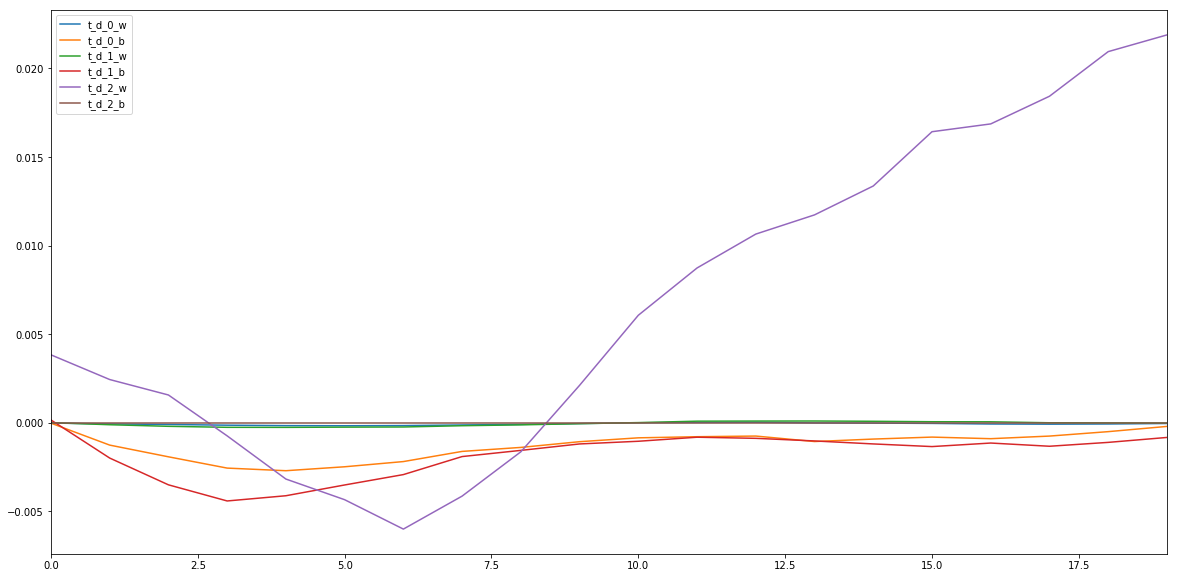

In [102]:
grads.iloc[:20,:6].plot(figsize=(20,10))

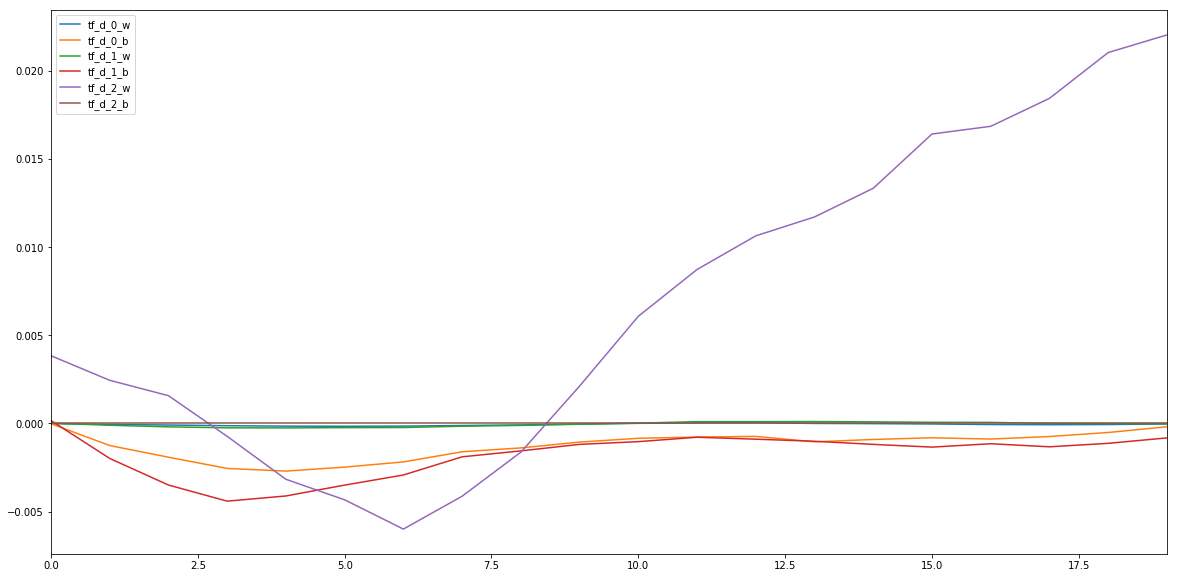

In [103]:
grads.iloc[:20,len(t_cols):6+len(t_cols)].plot(figsize=(20,10))

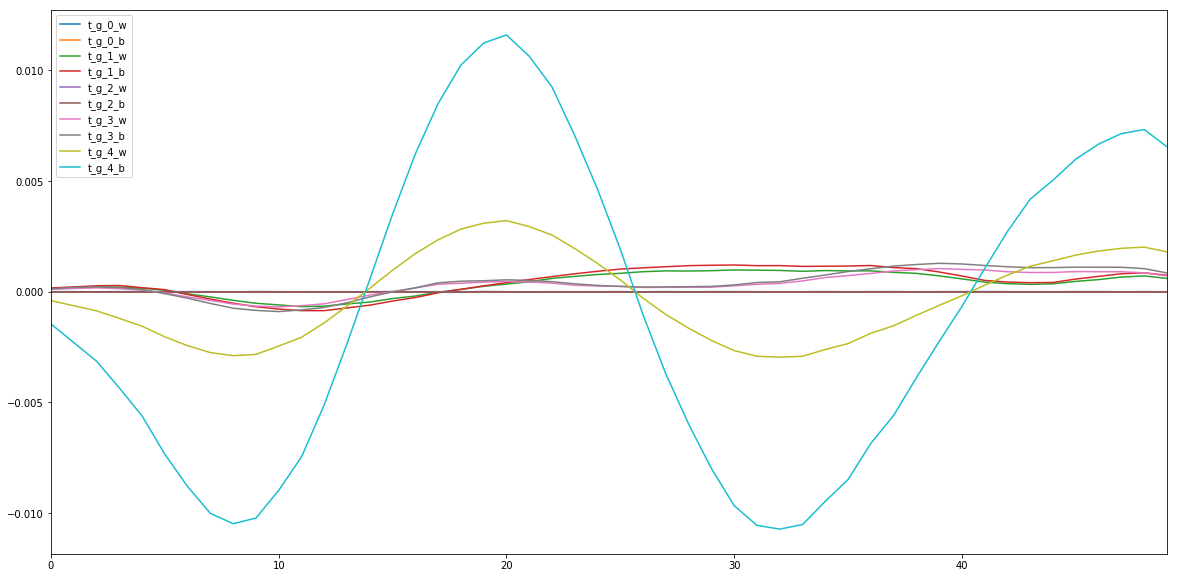

In [104]:
grads.iloc[:50,6:len(t_cols)].plot(figsize=(20,10))

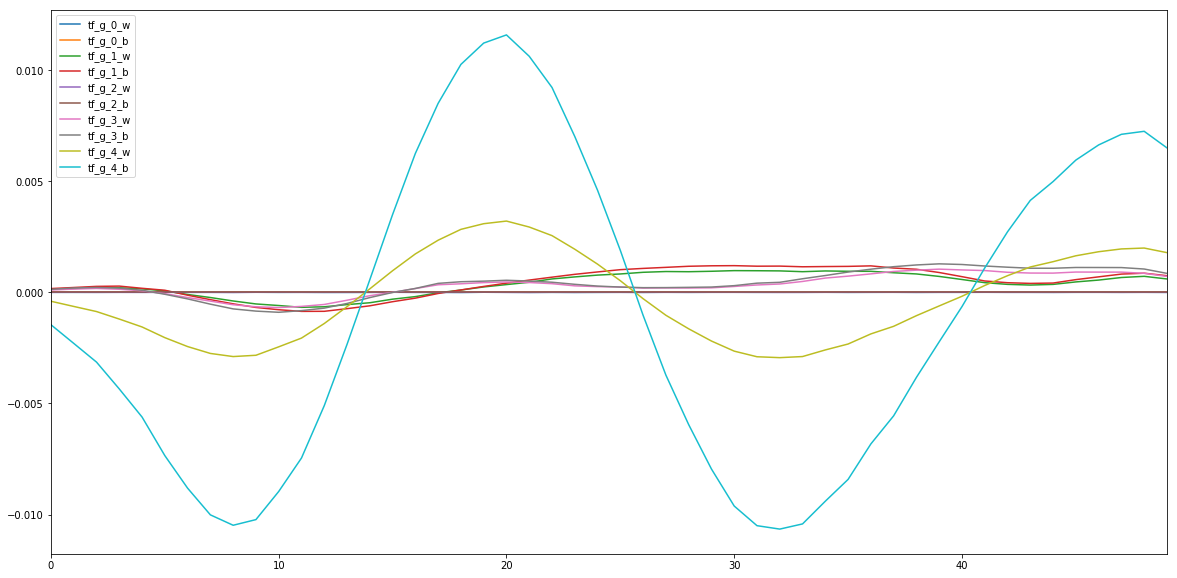

In [105]:
grads.iloc[:50,6+len(t_cols):].plot(figsize=(20,10))

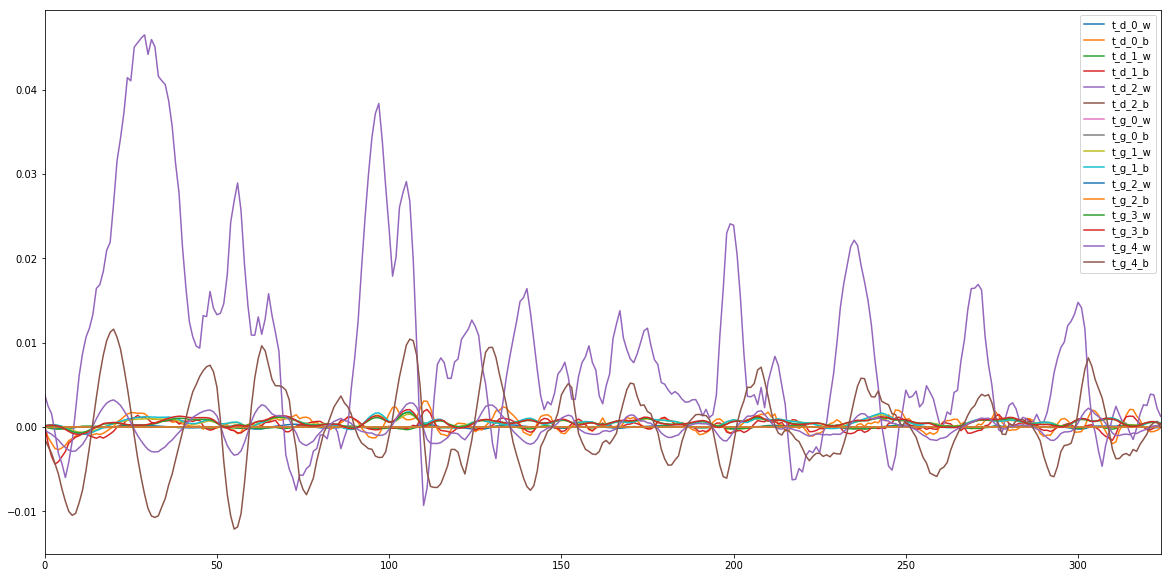

In [106]:
grads.iloc[:,:len(t_cols)].plot(figsize=(20,10))

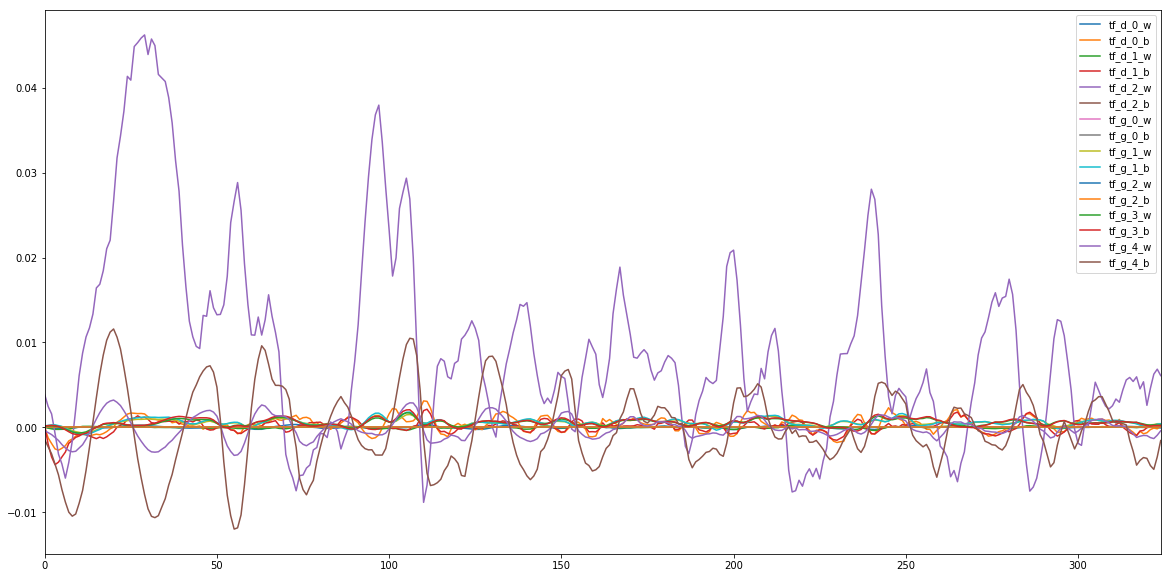

In [107]:
grads.iloc[:,len(t_cols):].plot(figsize=(20,10))

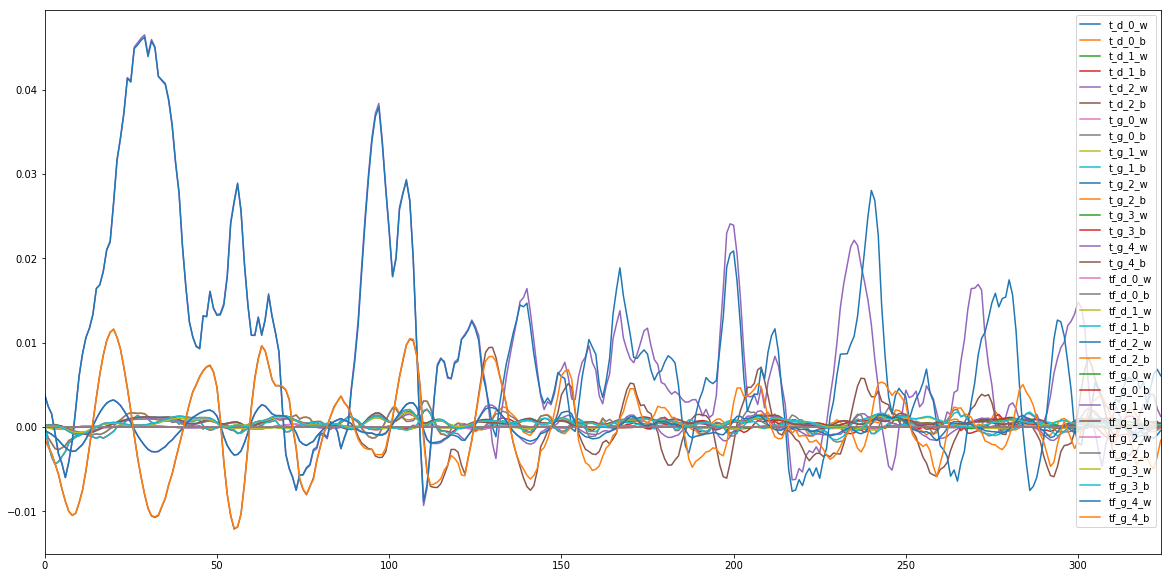

In [108]:
grads.plot(figsize=(20,10))

In [109]:
weights = pd.DataFrame(np.concatenate([t_stats[3], t_stats[4], tf_stats[3], tf_stats[4]], axis=1), 
                       columns=t_cols + tf_cols)

In [110]:
weights.head()

,t_d_0_w,t_d_0_b,t_d_1_w,t_d_1_b,t_d_2_w,t_d_2_b,t_g_0_w,t_g_0_b,t_g_1_w,t_g_1_b,t_g_2_w,t_g_2_b,t_g_3_w,t_g_3_b,t_g_4_w,t_g_4_b,tf_d_0_w,tf_d_0_b,tf_d_1_w,tf_d_1_b,tf_d_2_w,tf_d_2_b,tf_g_0_w,tf_g_0_b,tf_g_1_w,tf_g_1_b,tf_g_2_w,tf_g_2_b,tf_g_3_w,tf_g_3_b,tf_g_4_w,tf_g_4_b
0,0.000030,-0.000704,-0.000137,-0.006386,0.001408,0.050698,-0.000147,-0.002124,1.000000,0.000000,-0.000195,0.00146,1.000000,0.000000,0.000051,-0.001975,0.000030,-0.000704,-0.000137,-0.006386,0.001408,0.050698,-0.000147,-0.002124,1.000000,0.000000,-0.000195,0.00146,1.000000,0.000000,0.000051,-0.001975
1,0.000030,-0.000714,-0.000141,-0.006384,0.001372,0.050698,-0.000147,-0.002124,0.999959,-0.000042,-0.000194,0.00146,0.999961,-0.000039,0.000083,-0.001931,0.000030,-0.000714,-0.000141,-0.006384,0.001372,0.050698,-0.000147,-0.002124,0.999959,-0.000042,-0.000194,0.00146,0.999961,-0.000039,0.000083,-0.001931
2,0.000033,-0.000693,-0.000137,-0.006362,0.001342,0.050698,-0.000145,-0.002124,0.999928,-0.000076,-0.000194,0.00146,0.999928,-0.000080,0.000118,-0.001880,0.000033,-0.000693,-0.000137,-0.006362,0.001342,0.050698,-0.000145,-0.002124,0.999928,-0.000076,-0.000194,0.00146,0.999928,-0.000080,0.000118,-0.001880
3,0.000040,-0.000647,-0.000129,-0.006318,0.001314,0.050698,-0.000144,-0.002124,0.999888,-0.000113,-0.000193,0.00146,0.999894,-0.000116,0.000158,-0.001828,0.000040,-0.000647,-0.000129,-0.006318,0.001314,0.050698,-0.000144,-0.002125,0.999888,-0.000113,-0.000193,0.00146,0.999894,-0.000116,0.000158,-0.001828
4,0.000049,-0.000580,-0.000116,-0.006249,0.001289,0.050698,-0.000144,-0.002124,0.999854,-0.000148,-0.000192,0.00146,0.999875,-0.000136,0.000202,-0.001770,0.000049,-0.000580,-0.000116,-0.006249,0.001289,0.050698,-0.000144,-0.002125,0.999855,-0.000148,-0.000192,0.00146,0.999875,-0.000136,0.000202,-0.001770


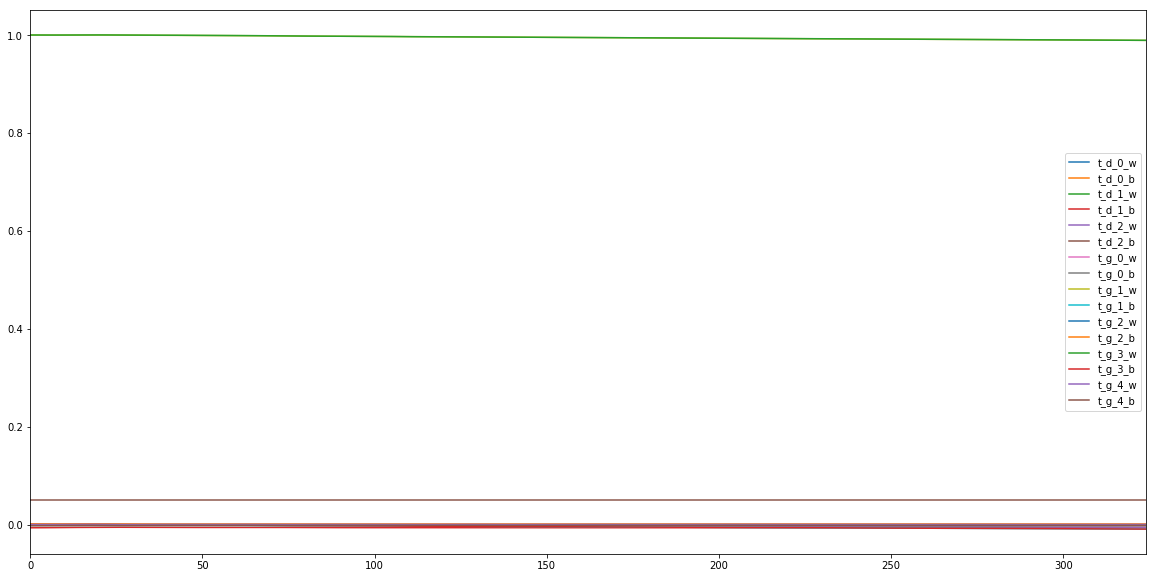

In [111]:
weights.iloc[:,:len(t_cols)].plot(figsize=(20,10))

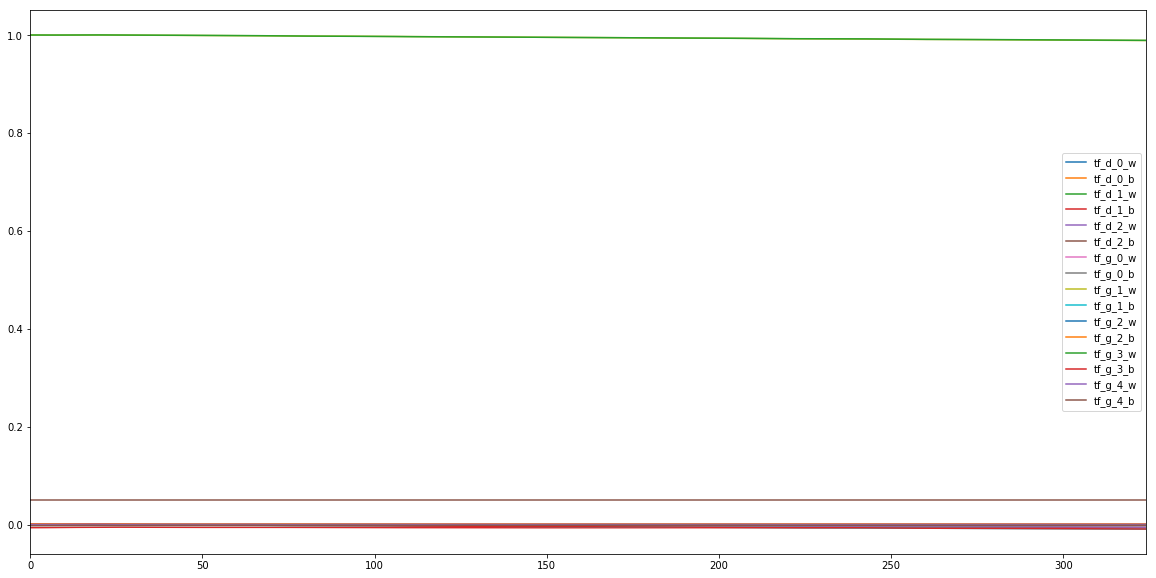

In [112]:
weights.iloc[:,len(t_cols):].plot(figsize=(20,10))

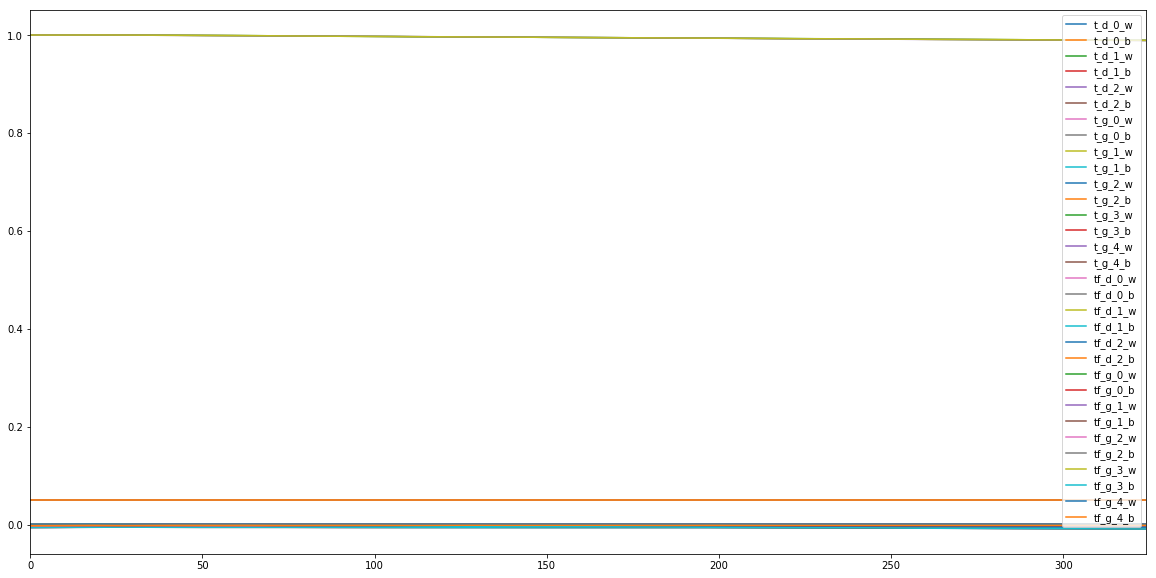

In [113]:
weights.plot(figsize=(20,10))

In [48]:
x = torch.zeros(10, 1)

In [49]:
def _calculate_fan_in_and_fan_out(tensor):
    dimensions = tensor.dim()
    if dimensions < 2:
        raise ValueError("Fan in and fan out can not be computed for tensor with fewer than 2 dimensions")

    num_input_fmaps = tensor.size(1)
    num_output_fmaps = tensor.size(0)
    receptive_field_size = 1
    if tensor.dim() > 2:
        receptive_field_size = tensor[0][0].numel()
    fan_in = num_input_fmaps * receptive_field_size
    fan_out = num_output_fmaps * receptive_field_size

    return fan_in, fan_out

In [50]:
_calculate_fan_in_and_fan_out(x)

(1, 10)